# Create Baseline Model

Goal: Create a simple neural network based regression model that outputs a steering angle prediction prediction.

#### Resources:

[Keras regression model tutorial](http://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/)

#### Import Sci-kit Learn, pandas and Keras

In [1]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd
import matplotlib.pyplot as plt


Using TensorFlow backend.


#### Load data using pandas dataframe

In [2]:
 data = pd.read_csv("driving_log.csv")

#### Example of a frame

Cell shows filenames for center, left and center images as well as steering, throttle, brake and speed.

In [3]:
print (data.ix[343])

center      IMG/center_2016_12_01_13_33_13_011.jpg
left          IMG/left_2016_12_01_13_33_13_011.jpg
right        IMG/right_2016_12_01_13_33_13_011.jpg
steering                                  0.195719
throttle                                  0.985533
brake                                            0
speed                                      30.1779
Name: 343, dtype: object


### Load Images

In [4]:
import cv2

sample_path = data.ix[0][0]

#### Normalize Image

In [5]:
def normalize_image(image):
    image = image / 255
    image -= 0.5
    return image

#### Resize Image

In [15]:
def resize_image(image):
    crop_image = image[50:150, :]
    image = cv2.resize(crop_image, (200, 66), interpolation=cv2.INTER_AREA)
    plt.imshow(image)
    plt.show()
    return image

#### Get images from path

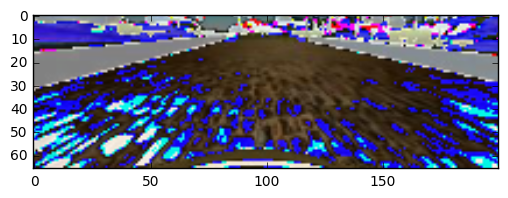

In [17]:
def get_image(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = normalize_image(image)
    image = resize_image(image)
    return image

image = get_image(sample_path)    

#### Generate Data